In [1]:
! pip install numpy 
! pip install i pandas
! pip install scikit-learn
! pip install matplotlib
! pip install seaborn
! pip install tensorflow
! pip install nltk
! pip install wordcloud



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# Deep learning
from keras.models import Sequential
from keras.layers import Embedding,Dropout,LSTM,Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [9]:
# machine learning
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import nltk
import pickle
import seaborn as sns
from nltk.stem import PorterStemmer
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [10]:
train_data = pd.read_csv("train.txt",header=None,sep=";",names=["comment","Emotion"],encoding="utf")

In [11]:
train_data

,comment,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [12]:
train_data["length"] = [len(x) for x in train_data["comment"]]

In [13]:
train_data

,comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


In [14]:
train_data.shape

(16000, 3)

In [15]:
train_data.isnull().sum()

comment    0
Emotion    0
length     0
dtype: int64

In [16]:
train_data.duplicated().sum()

np.int64(1)

In [17]:
train_data.drop_duplicates(inplace=True)

In [ ]:
# EDA

In [19]:
train_data["Emotion"].value_counts()

Emotion
joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

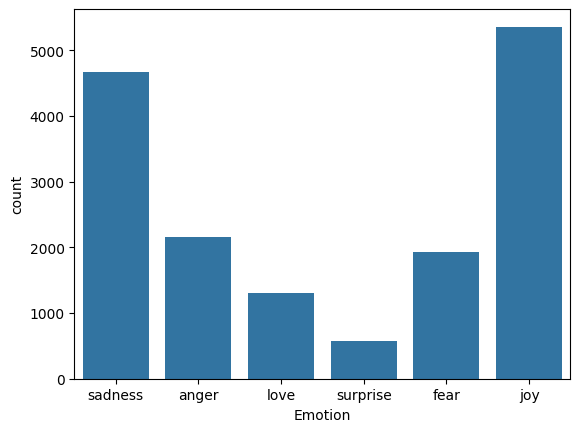

In [20]:
sns.countplot(x=train_data["Emotion"])
plt.show()

In [21]:
df2 = train_data.copy()
df2["length"].values

array([ 23, 108,  48, ...,  30,  59,  62])

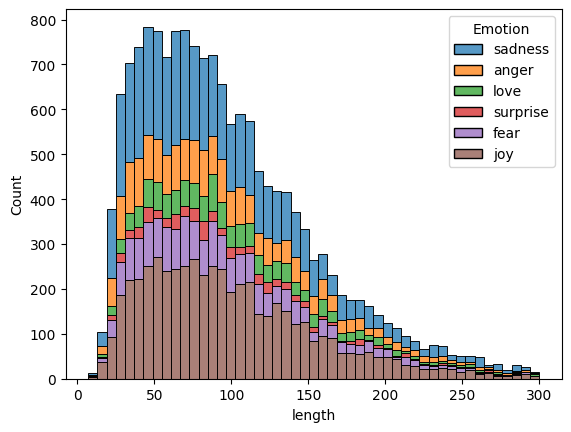

In [22]:
sns.histplot(data=df2,x="length",hue="Emotion",multiple="stack")
plt.show()

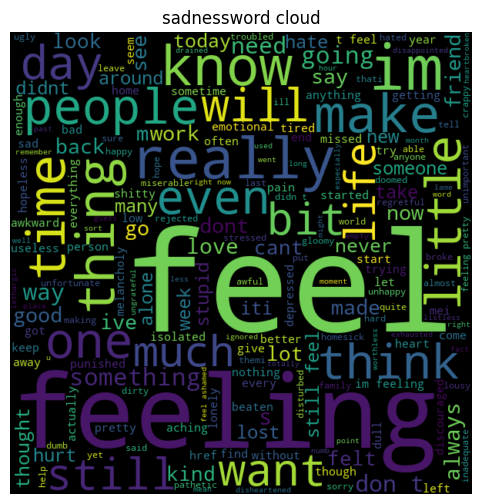

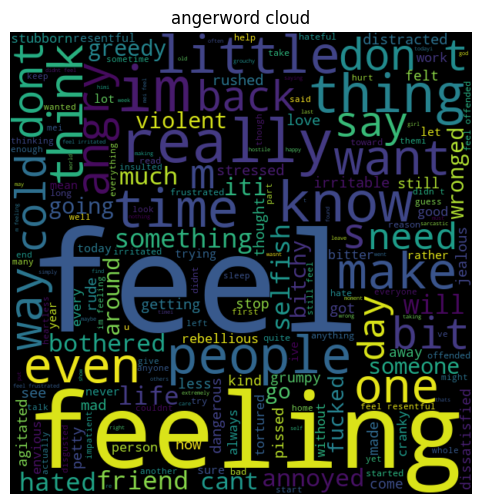

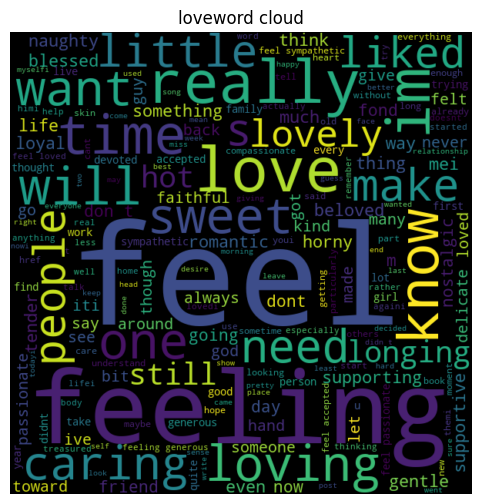

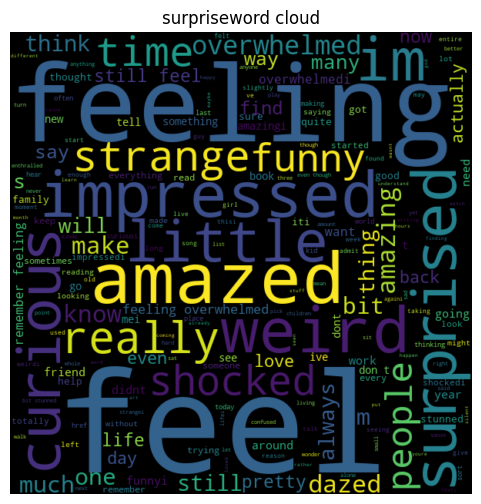

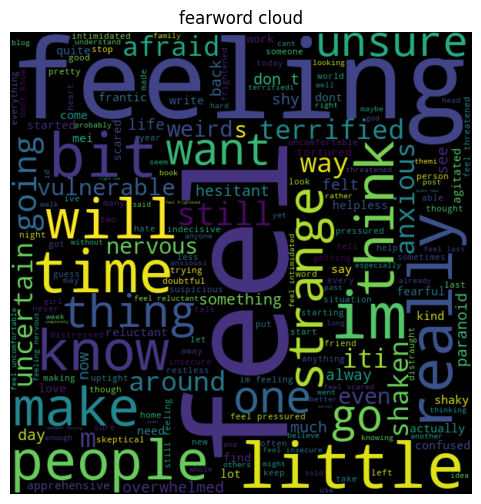

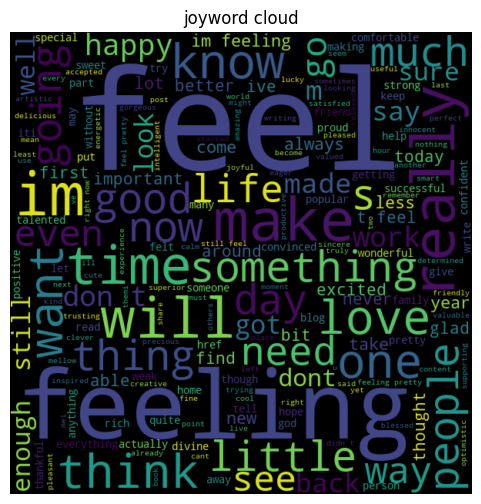

In [27]:
def word_cloud(wordcloud,df):
    plt.figure(figsize=(6,6))
    plt.title(emotion+"word cloud")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  
    plt.show()

emotion_list = train_data["Emotion"].unique()

for emotion in emotion_list:
       text =  "".join( sentence for sentence in train_data.loc[train_data["Emotion"]==emotion,"comment"])
       wc = WordCloud(width=600,height=600).generate(text)
       word_cloud(wc,emotion)
    